

Tarea práctica 5 - Análisis Numérico

Edison Santiago Tutalcha Bastidas

Código: 1927038-3147


### **Ejercicio 2** (Contra-ejemplo de Runge)

---

Sea la función $$f(x)= \dfrac{1}{x^2+1}$$ 

para $[-5,5]$. Considere el conjunto de nodos $(x_i,f(x_i))$  para las dos siguientes discretizaciones:


- *Discretizacion 1:* sea $x_i=x_0 + i h$,  $i=0,1,...n$, con $h=1/n$, para un cierto $n$.


- *Discretizacion 2:* $x_i= 5 \cos\left( \dfrac{n-i}{n} \pi \right)$,  $i=0,1,...n$,  para un cierto $n$.



Usando un polinomios interpolante de Lagrange $P_n(x)$ de grado $n$, compruebe numericamente que:


1.   $ \| P_{6}(x) - f(x)  \|_{\infty}  < \| P_{12}(x) - f(x)  \|_{\infty} $ para la discretizacion 1 en el intervalo $[-5,5]$



2.   $ \| P_{6}(x) - f(x)  \|_{\infty}  >  \| P_{12}(x) - f(x)  \|_{\infty} $ para la discretizacion 2 en el intervalo $[-5,5]$

In [5]:
from matplotlib import pyplot as plt     # Importamos las librerias a usar
import numpy as np

# Definimos nuestra función para el contraejemplo
def f(x):
  return 1/((x**2)+1)


# Definimos los polinomios de Lagrange iniciando el con un espacio de memoria m=1 (para productos usamos 1)
def L(i,x,xs): # Tomamos x fijo y variamos según la fórmula vista en clase con la información de los nodos.
  m=1                                   
  for k in range(len(xs)): # Note que aqui el comando range va a tomar valores desde 0 hasta n-1 quitando el caso donde i=k
    if i!=k:               
      m*=(x-xs[k])/(xs[i]-xs[k]) # Programamos la productoria 
  return m


# Se define  el polinomio Interpolante de Lagrange con la informacion de los nodos como parametros de entrada
def p(x,xs,ys):
  m=0              # Note que dado que lo que iniciaremos es una suma, lo hacemos sobre un espacio de memoria con valor inicial 0
  for i in range(len(ys)):  # Note que aqui el comando range va a tomar valores desde 0 hasta n-1
    m+=ys[i]*L(i,x,xs)           # Programamos la sumatoria
  return m

# Definimos el dominio [-5,5]
dominio=np.linspace(-5,5)


# PROGRAMAMOS LAS DISCRETIZACIONES 



def xs1(n):  # Primera discretización
  h=10/n          # Tamaño del salto para la discretización 1

  listax_1=[]         # Definimos la lista con los datos 
  for i in range(n+1):     # range en este caso va a recorrer el numero de nodos 
    listax_1+=[-5+i*h]           # Se agrega a la listax_1 las coordenadas "x" de los nodos

  listax_1=np.array(listax_1)         # Pasamos la lista a un arreglo para poder usar los datos
  return listax_1


# Asociado a la listax_1, crearemos otra lista que lleve el valor de las imagenes para cada x

def ys1(n):                  
  h=1/n     # Tamaño del salto para la discretizacion 1

  listay_1=[]          # Definimos nuestra lista para las imagenes de la primer discretización
  for i in range(n+1):           # range en este caso va a recorrer el numero de nodos 
    listay_1+=[f(xs1(n)[i])]          # Se agrega a la listay_1 las coordenadas "y" de los nodos

  listay_1=np.array(listay_1)                 # Pasamos la lista a un arreglo para poder usar los datos
  return listay_1




def xs2(n):  # Segunda discretización
  h=1/n

# Realizamos un proceso análogo (programación) al de la primer discretización, cambiando la forma en que se define la partición para los elementos en x
# de la listax_2 y añadiendo sus imagenes bajo la función f previamente definida en listay_2
  listax_2=[]
  for i in range(n+1):
    listax_2+=[5*np.cos(((n-i)*np.pi)/n)] # Añadimos a listax_2
  listax_2=np.array(listax_2) # Pasamos la lista a un arreglo 

  return listax_2


def ys2(n):
  h=1/n
  listay_2=[]
  for i in range(n+1):
    listay_2+=[f(xs2(n)[i])]
  listay_2=np.array(listay_2)

  return listay_2



#Verificamos las desigualdades solicitadas


# Primer discretización
# Calculamos las diferencias posibles entre el polinomio interpolante y la funcion, luego extraemos los maximos usando Numpy (Norma infinito)
diferencias_6=p(dominio,xs1(6),ys1(6))-f(dominio)
diferencias_12=p(dominio,xs1(12),ys1(12))-f(dominio)

# Máximos
max_6=np.max(np.abs(diferencias_6))
max_12=np.max(np.abs(diferencias_12))

# Efectuamos la comparación

print("En el caso de la primer discretización tenemos que: ")
print("El error de P_6 = ",max_6)
print("El error de P_12 = ",max_12)
print("Por tanto en esta discretización sobre el intervalo [-5,5], a mayor número de nodos, mayor error.")


print(" ")
# Segunda discretización
# Calculamos las diferencias posibles entre el polinomio interpolante y la funcion, luego extraemos los maximos usando Numpy (Norma infinito)
diferencias_6=p(dominio,xs2(6),ys2(6))-f(dominio)
diferencias_12=p(dominio,xs2(12),ys2(12))-f(dominio)

# Máximos
max_6=np.max(np.abs(diferencias_6))
max_12=np.max(np.abs(diferencias_12))

# Efectuamos la comparación:
print("En el caso de la segunda discretización tenemos que: ")
print("El error de P_6 = ",max_6)
print("El error de P_12 = ",max_12)
print("Por tanto en esta discretización sobre el intervalo [-5,5], a mayor numero de nodos, menor error.")



En el caso de la primer discretización tenemos que: 
El error de P_6 =  0.6160412239303202
El error de P_12 =  3.617846236863898
Por tanto en esta discretización sobre el intervalo [-5,5], a mayor número de nodos, mayor error.
 
En el caso de la segunda discretización tenemos que: 
El error de P_6 =  0.3102789400808862
El error de P_12 =  0.08437868663719084
Por tanto en esta discretización sobre el intervalo [-5,5], a mayor numero de nodos, menor error.


### **Ejercicio 3** (Splines lineales)


**Problema:** Dado el conjunto de datos presentado en la tabla 

| x | | y 
|-------| |-----------
|-2.0 | |  6.1 
|-1.0 | |  5.4 
| 0.0 | |  4.2 
| 1.0 | | -2.0 
| 2.0 | | -1.5 
| 3.0 | |  1.4 


Realize un programa en python que realize lo siguiente (SIN USAR EL MODULO SCIPY):

- Construir los polinomios splines **lineales** como funciones  

- Construir la función el polinómio interpolante splines lineal

- Graficar el polinomio interpolante y verificar que pasa por los nodos.

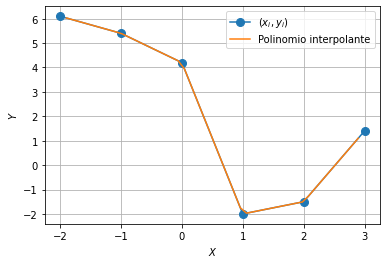

Note que el polinomio interpolante pasa por los nodos dados en la tabla (puntos azules). Luego, la interpolación es adecuada 


In [15]:
from matplotlib import pyplot as plt   # Importamos las librerias a usar
import numpy as np

# Definimos las columnas como arreglos de números a usar
X = np.array((-2,-1,0,1,2,3))
Y = np.array((6.1,5.4,4.2,-2,-1.5,1.4))



# Definimos los Splines Lineales
# Como tenemos n+1 nodos luego tenemos n splines

def s(x,i,X,Y): # En este caso i=1,2,3,4,5 pues generaremos 5 splines

  m=(Y[i]-Y[i+1])/(X[i]-X[i+1])        # m es la pendiente de la recta que pasa entre los nodos i y i+1
  y=m*(x-X[i+1])+Y[i+1]           # calculamos todos los valores que componen la recta entre los dos nodos de entrada
  return y

# Establecemos el dominio para el polinomio interpolante
dominio=np.linspace(-2,3)  

# Polinomio interpolante (Compuesta de todos los polinomios "s" previamente definidos)
def S(x,X,Y):
  for i in range(len(X)-1):               # Empezamos un ciclo que va a recoger todos los polinomios "s"

    if (x>X[i])and(x<X[i+1]):             # Esta condición se introduce para calcular las imagenes sobre los valores de cada intervalo especificamente [x_i,x_i+1]
      return s(x,i,X,Y)                   # Dicha funcion va a devolver las imagenes de los splines sobre los intervalos dados por la condición anterior.

# Así, el polinomio interpolante es la colección de los segmentos (splines) que la conforman.

#----------------------------------------------------------------------------------------------------------------------------------------------------
i=[]                                      # Creamos una lista para los valores del polinomio interpolante
for j in dominio:                               
  i+=[S(j,X,Y)]                           # Agregamos los valores del polinomio a la lista
i=np.array(i)         # Pasamos la lista a un arreglo


# Graficamos el polinomio interpolante con los nodos de las listas X,Y
plt.plot(X,Y, marker='o', markersize=8, label='$(x_i,y_i)$')   # Graficamos los nodos
plt.plot(dominio,i, label="P(x)")    # Graficamos los valores del polinomio interpolante asociados al dominio [-2,3]
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.grid()
plt.legend()
plt.show()              


print("Note que el polinomio interpolante P(x) pasa por los nodos dados en la tabla (puntos azules). Luego, la interpolación es adecuada ")